In [3]:
from stable_diffusion import *
from stable_diffusion.model_loader import load_from_standard_weights

In [4]:
# !pip install pytorch-lightning
# !pip install transformers

In [5]:
chkpoint = load_from_standard_weights('./data/weights/v1-5-pruned-emaonly.ckpt')

In [6]:
clip = CLIP()
encoder = VAE_Encoder()
decoder = VAE_Decoder()
diff = Diffusion()

In [7]:
clip.load_state_dict(chkpoint['clip'], strict = True)
encoder.load_state_dict(chkpoint['encoder'], strict = True)
decoder.load_state_dict(chkpoint['decoder'], strict = True)
diff.load_state_dict(chkpoint['diffusion'], strict = True)

<All keys matched successfully>

In [8]:
from transformers import CLIPTokenizer
tokenizer = CLIPTokenizer("./data/tokenizer_vocab.json", merges_file="./data/tokenizer_merges.txt")

In [18]:
prompt = "a cat dancing 8k"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8
strength = 0.9
num_inference_steps = 50
seed = 42

models = {
    "clip": clip,
    "encoder": encoder,
    "decoder": decoder,
    "diffusion": diff,
}
sampler = 'ddpm'


In [19]:
output_img = generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=None,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device='cuda',
    idle_device="cpu",
    tokenizer=tokenizer,
)

100%|██████████| 50/50 [00:22<00:00,  2.21it/s]


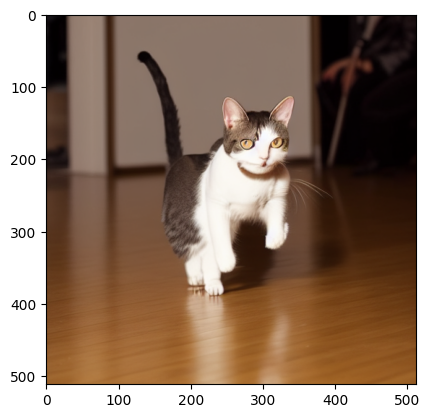

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the output_img to a numpy array
# output_img_np = output_img

# Display the output_img
plt.imshow(output_img.astype(np.uint8))
plt.show()